In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys 
sys.path.insert(0, "../src")
import configparser
import pandas as pd 

from utils.dice_score import multiclass_dice_coeff
import numpy as np
import torch
import matplotlib.pyplot as plt
from os.path import join as oj
import my_data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cuda = False # torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")
config = configparser.ConfigParser()
config.read('../config.ini');
data_path =config['DATASET']['data_path'] 


In [17]:
x,y, _, _ = my_data.load_layer_data(oj(data_path, 'lno'))
y_second, _, _ = my_data.load_reannotation(oj(data_path, 'lno_second_annotation'))
y_second_formatted = np.copy(y_second)
y_second_formatted_vals = np.unique(y_second_formatted)
for i,val in enumerate(y_second_formatted_vals):
    y_second_formatted[y_second == val] = i

ImageJ series: invalid metadata or corrupted file ()


In [18]:
x.shape

(6, 1, 2048, 2048)

TypeError: Invalid shape (2048,) for image data

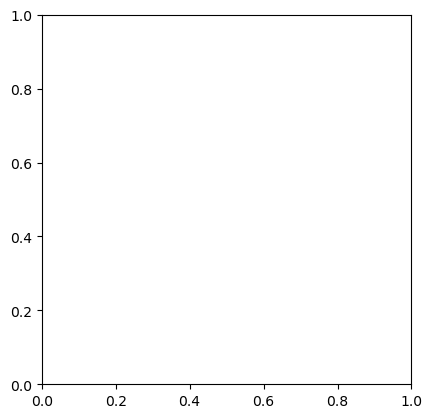

In [22]:
# show in black white
plt.imshow(y[-2,0], cmap='gray')
# turn off axes
plt.axis('off')

In [4]:
y_second_formatted = y_second_formatted[1024:, :1024] # only one quarter annotated
y = y[-1,1024:, :1024]

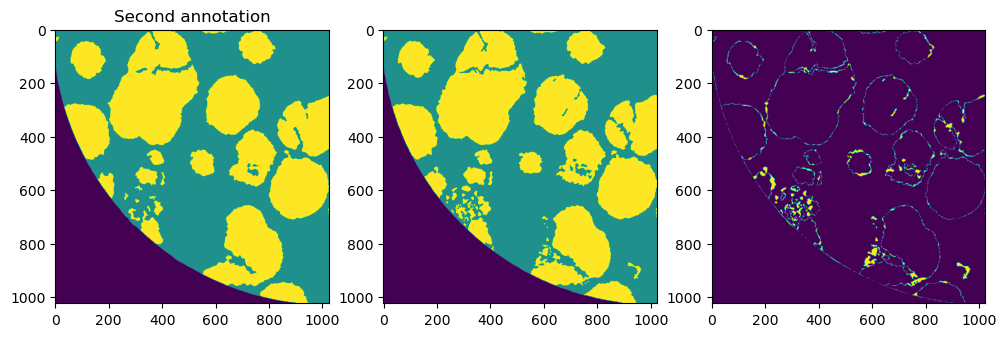

In [7]:
fig, axes = plt.subplots(ncols=3, figsize= (12,4))
axes[0].imshow(y)
# add title
axes[0].set_title('First annotation')
axes[1].imshow(y_second_formatted)

axes[0].set_title('Second annotation')
axes[2].imshow(y != y_second_formatted)

In [8]:
y_pred = y_second_formatted[None,:]
y_pred_one_hot = torch.nn.functional.one_hot(torch.Tensor(y_pred).to(torch.int64), 
                                            num_classes=3).permute(0, 3, 1, 2).squeeze()[None, :]


In [9]:
print(multiclass_dice_coeff(y_pred_one_hot.float(), 
                    torch.Tensor(y[None,:]), 
                    num_classes=3).item())


0.9761262536048889


In [11]:
y.shape

(1024, 1024)